In [1]:
#import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [2]:
#import the dataset
df_weather = pd.read_csv('weather.csv')
df_weather.head(5)

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [3]:
#EDA

In [4]:
#Choosing the column for the analysis
df_weather = df_weather[['date', 'cbl (Mean CBL Pressure-hpa)']]
df_weather

,date,cbl (Mean CBL Pressure-hpa)
0,1-Jan-42,1020.3
1,2-Jan-42,1016.2
2,3-Jan-42,1006.8
3,4-Jan-42,1001.5
4,5-Jan-42,1013.4
...,...,...
29884,27-Oct-23,974.2
29885,28-Oct-23,970.1
29886,29-Oct-23,972.0
29887,30-Oct-23,979.9


In [5]:
#Checking the Null values
df_weather.isnull().sum()

date                           0
cbl (Mean CBL Pressure-hpa)    0
dtype: int64

In [6]:
#Cheking the datatyoe and total count of data
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         29889 non-null  object 
 1   cbl (Mean CBL Pressure-hpa)  29889 non-null  float64
dtypes: float64(1), object(1)
memory usage: 467.1+ KB


In [7]:
# The datatype of date is object we change to datetime
df_weather['date'] = pd.to_datetime(df_weather['date'], format='%d-%b-%y')

# Adjusting the years if greater than 2023
df_weather['date'] = df_weather['date'].apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2023 else x)

print(df_weather)

            date  cbl (Mean CBL Pressure-hpa)
0     1942-01-01                       1020.3
1     1942-01-02                       1016.2
2     1942-01-03                       1006.8
3     1942-01-04                       1001.5
4     1942-01-05                       1013.4
...          ...                          ...
29884 2023-10-27                        974.2
29885 2023-10-28                        970.1
29886 2023-10-29                        972.0
29887 2023-10-30                        979.9
29888 2023-10-31                        983.2

[29889 rows x 2 columns]


In [8]:
#after changing the datatype of the data Again Cheking the datatype and total count of the data
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         29889 non-null  datetime64[ns]
 1   cbl (Mean CBL Pressure-hpa)  29889 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 467.1 KB


In [9]:
#Set the date coloumn as index
df_weather.set_index("date", inplace=True)

In [10]:
df_weather

,cbl (Mean CBL Pressure-hpa)
date,
1942-01-01,1020.3
1942-01-02,1016.2
1942-01-03,1006.8
1942-01-04,1001.5
1942-01-05,1013.4
...,...
2023-10-27,974.2
2023-10-28,970.1
2023-10-29,972.0


In [11]:
# Extract the relevant time period
train_data = df_weather['2019-01-01':'2022-12-31']
test_data = df_weather['2023-01-01':]


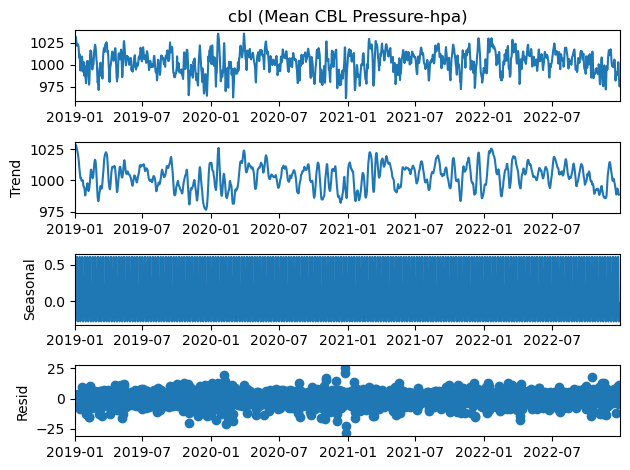

In [12]:
#Decomposition of Time Series
from statsmodels.tsa.seasonal import seasonal_decompose
decom = seasonal_decompose(train_data['cbl (Mean CBL Pressure-hpa)'], model='additive')
decom.plot()
plt.show()

#### Simple Time Series Models(Simple Moving Average)

<Axes: xlabel='date'>

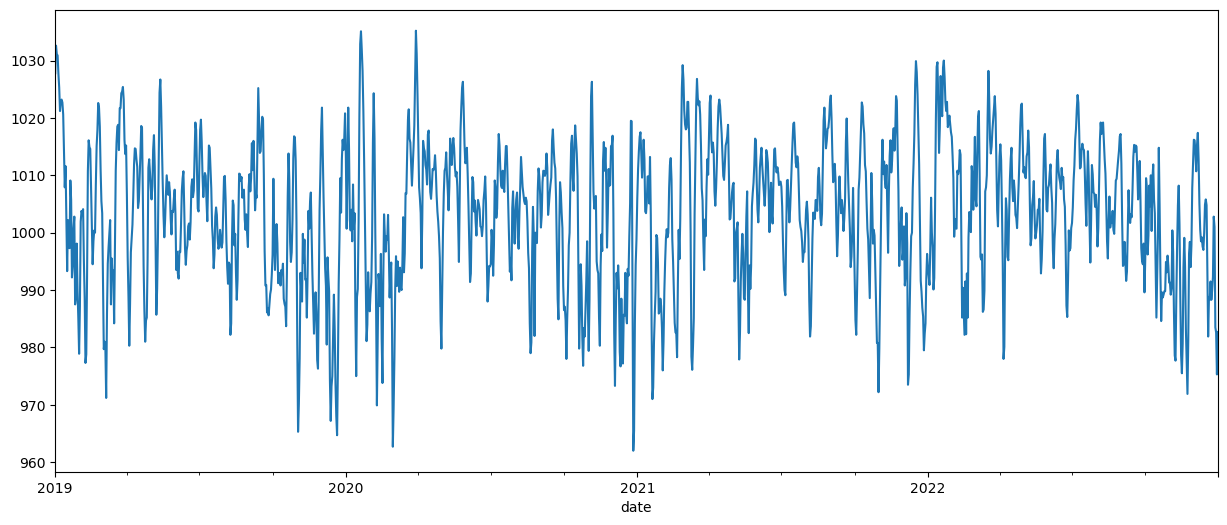

In [13]:
train_data['cbl (Mean CBL Pressure-hpa)'].plot(figsize=(15,6))

In [14]:
train_data['cbl (Mean CBL Pressure-hpa) 10 days']= train_data['cbl (Mean CBL Pressure-hpa)'].rolling(window=10).mean()


C:\Users\415vi\AppData\Local\Temp\ipykernel_18112\815162478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['cbl (Mean CBL Pressure-hpa) 10 days']= train_data['cbl (Mean CBL Pressure-hpa)'].rolling(window=10).mean()


In [15]:
train_data['cbl (Mean CBL Pressure-hpa) 10 days'].dropna()

date
2019-01-10    1026.55
2019-01-11    1025.83
2019-01-12    1024.00
2019-01-13    1021.68
2019-01-14    1019.75
               ...   
2022-12-27     991.77
2022-12-28     990.82
2022-12-29     990.89
2022-12-30     989.55
2022-12-31     988.99
Name: cbl (Mean CBL Pressure-hpa) 10 days, Length: 1452, dtype: float64

<Axes: xlabel='date'>

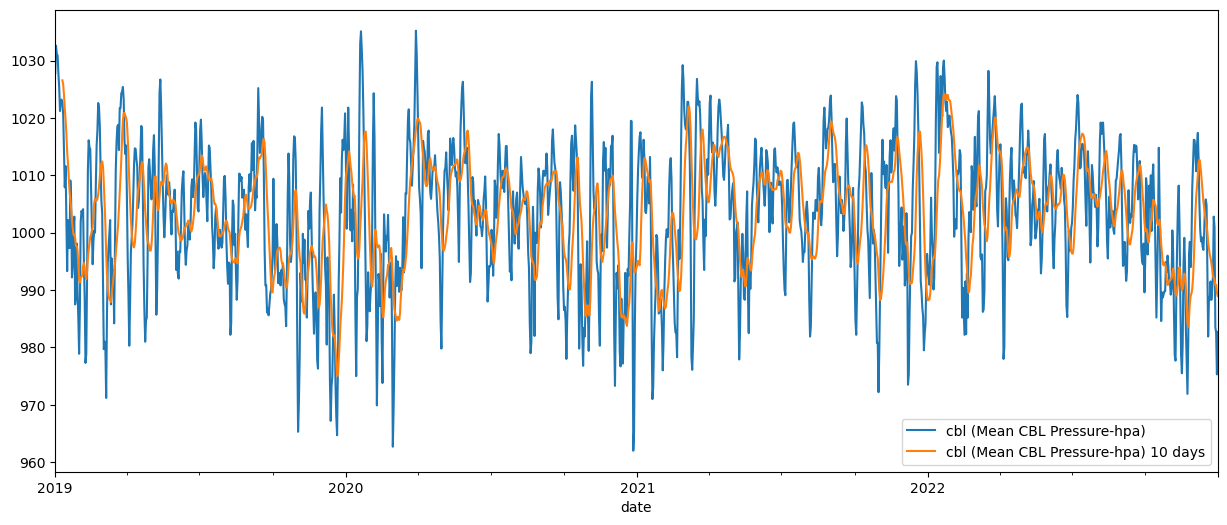

In [16]:
train_data[['cbl (Mean CBL Pressure-hpa)','cbl (Mean CBL Pressure-hpa) 10 days']].plot(figsize=(15,6))

#### Exponential Smoothing 

##### Simple Exponential Smooting

In [17]:
# Apply Simple exponential smoothing to the training data
simple_expo_sm = SimpleExpSmoothing(train_data['cbl (Mean CBL Pressure-hpa)']).fit()
print(simple_expo_sm.summary())

                            SimpleExpSmoothing Model Results                           
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                      SimpleExpSmoothing   SSE                          60320.911
Optimized:                                True   AIC                           5439.735
Trend:                                    None   BIC                           5450.309
Seasonal:                                 None   AICC                          5439.762
Seasonal Periods:                         None   Date:                 Sun, 31 Dec 2023
Box-Cox:                                 False   Time:                         21:52:55
Box-Cox Coeff.:                           None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000              

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [18]:
predictions = simple_expo_sm.forecast(len(test_data))
print(predictions)

2023-01-01    982.7
2023-01-02    982.7
2023-01-03    982.7
2023-01-04    982.7
2023-01-05    982.7
              ...  
2023-10-27    982.7
2023-10-28    982.7
2023-10-29    982.7
2023-10-30    982.7
2023-10-31    982.7
Freq: D, Length: 304, dtype: float64


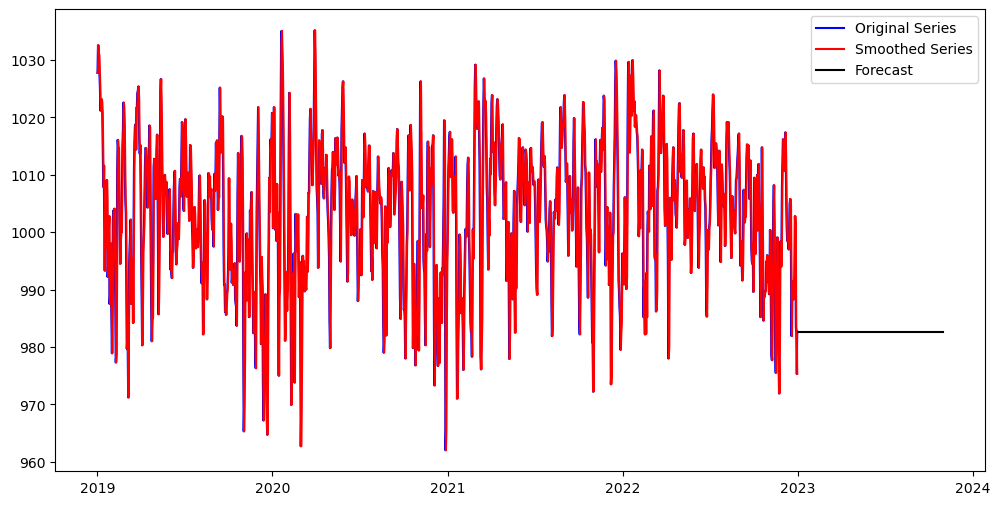

In [19]:
plt.figure(figsize=(12,6))
plt.plot(train_data['cbl (Mean CBL Pressure-hpa)'], color='blue', label='Original Series')
plt.plot(simple_expo_sm.fittedvalues, color='red', label='Smoothed Series')
plt.plot(predictions, color='black', label ='Forecast')
plt.legend()

In [20]:
#Find the metrices MAE, RMSE, MAPE on train data
mae_smothing_pred = mean_absolute_error(train_data['cbl (Mean CBL Pressure-hpa)'],simple_expo_sm.fittedvalues)
rmse_smothing_pred = mean_squared_error(train_data['cbl (Mean CBL Pressure-hpa)'],simple_expo_sm.fittedvalues)**0.5
mape_smothing_pred = mean_absolute_percentage_error(train_data['cbl (Mean CBL Pressure-hpa)'],simple_expo_sm.fittedvalues)

print("Simple_Exponential_Smothing = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_smothing_pred,rmse_smothing_pred,mape_smothing_pred))

Simple_Exponential_Smothing = MAE:5.018, RMSE:6.426, MAPE:0.005


In [21]:
#Find the metrices MAE, RMSE, MAPE on Test data
mae_smothing = mean_absolute_error(test_data['cbl (Mean CBL Pressure-hpa)'],predictions)
rmse_smothing = mean_squared_error(test_data['cbl (Mean CBL Pressure-hpa)'],predictions)**0.5
mape_smothing = mean_absolute_percentage_error(test_data['cbl (Mean CBL Pressure-hpa)'],predictions)

print("Simple_Exponential_Smothing = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_smothing,rmse_smothing,mape_smothing))

Simple_Exponential_Smothing = MAE:21.168, RMSE:23.945, MAPE:0.021


#### Holt Linear/Double exponential smoothing

In [22]:
#Holt Linear Trend also knows as Double Exponential smoothing model

In [23]:
double_expo_smoothing = Holt(train_data['cbl (Mean CBL Pressure-hpa)']).fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
print(double_expo_smoothing.summary())

                                   Holt Model Results                                  
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                                    Holt   SSE                          61870.376
Optimized:                                True   AIC                           5480.790
Trend:                                Additive   BIC                           5501.937
Seasonal:                                 None   AICC                          5480.847
Seasonal Periods:                         None   Date:                 Sun, 31 Dec 2023
Box-Cox:                                 False   Time:                         21:52:55
Box-Cox Coeff.:                           None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9945140              

In [25]:
#smoothing_level (alpha): This is the smoothing parameter for the level. It controls the weight given to the most recent observation in forecasting the next observation. In your case, it's approximately 0.9945.
#smoothing_trend (beta): This is the smoothing parameter for the trend. It controls the weight given to the most recent trend observation in forecasting the next trend. In your case, it's approximately 0.0236.

In [26]:
prdiction_double_smoothing = double_expo_smoothing.forecast(len(test_data))
print(prdiction_double_smoothing)

2023-01-01    982.321803
2023-01-02    981.986846
2023-01-03    981.651889
2023-01-04    981.316932
2023-01-05    980.981975
                 ...    
2023-10-27    882.169665
2023-10-28    881.834708
2023-10-29    881.499751
2023-10-30    881.164794
2023-10-31    880.829837
Freq: D, Length: 304, dtype: float64


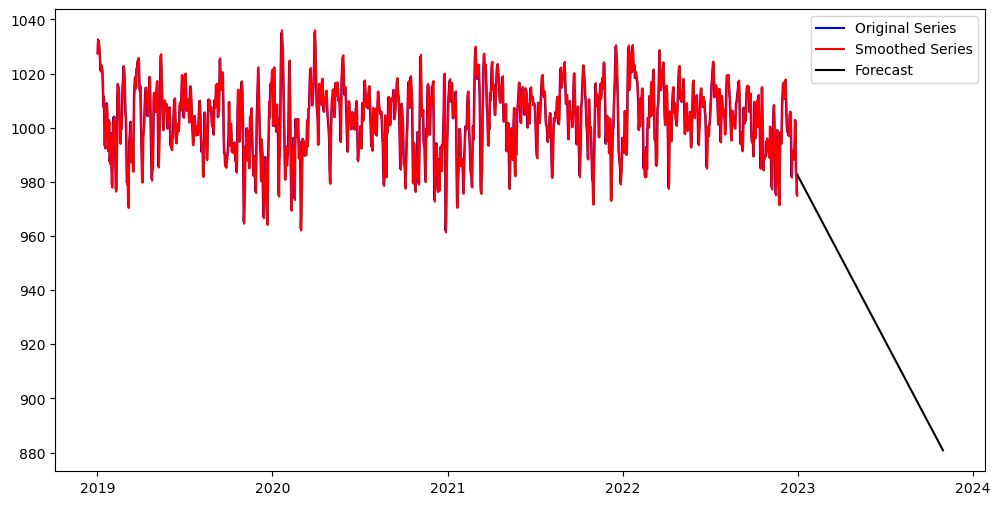

In [27]:
plt.figure(figsize=(12,6))
plt.plot(train_data['cbl (Mean CBL Pressure-hpa)'], color='blue', label='Original Series')
plt.plot(double_expo_smoothing.fittedvalues, color='red', label='Smoothed Series')
plt.plot(prdiction_double_smoothing, color='black', label ='Forecast')
plt.legend()

In [28]:
#Find the metrices MAE, RMSE, MAPE on train data
mae_double_smothing = mean_absolute_error(train_data['cbl (Mean CBL Pressure-hpa)'],double_expo_smoothing.fittedvalues)
rmse_double_smothing = mean_squared_error(train_data['cbl (Mean CBL Pressure-hpa)'],double_expo_smoothing.fittedvalues)**0.5
mape_double_smothing = mean_absolute_percentage_error(train_data['cbl (Mean CBL Pressure-hpa)'],double_expo_smoothing.fittedvalues)

print("double_Exponential_Smothing = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_double_smothing,rmse_double_smothing,mape_double_smothing))

double_Exponential_Smothing = MAE:5.082, RMSE:6.508, MAPE:0.005


In [29]:
#Find the metrices MAE, RMSE, MAPE on Test data
mae_double_smothing_pred = mean_absolute_error(test_data['cbl (Mean CBL Pressure-hpa)'],prdiction_double_smoothing)
rmse_double_smothing_pred = mean_squared_error(test_data['cbl (Mean CBL Pressure-hpa)'],prdiction_double_smoothing)**0.5
mape_double_smothing_pred = mean_absolute_percentage_error(test_data['cbl (Mean CBL Pressure-hpa)'],prdiction_double_smoothing)

print("double_Exponential_Smothing = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(mae_double_smothing_pred,rmse_double_smothing_pred,mape_double_smothing_pred))


double_Exponential_Smothing = MAE:71.545, RMSE:77.284, MAPE:0.071


### ARIMA

<Axes: xlabel='date'>

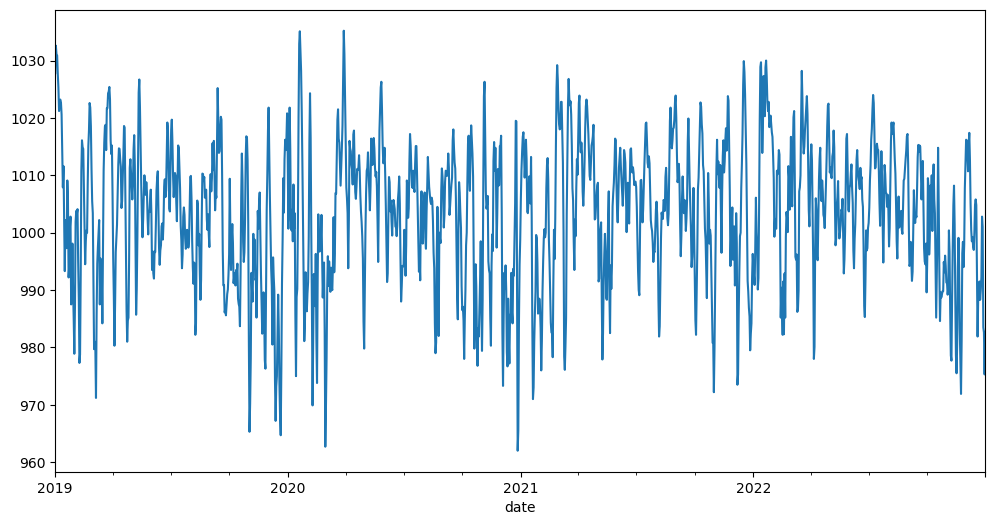

In [30]:
#plot the cbl column to check the trend, seasonilty
plt.figure(figsize=(12, 6))
train_data['cbl (Mean CBL Pressure-hpa)'].plot()

In [31]:
#Perfrom Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test: ")
dftest = adfuller(train_data['cbl (Mean CBL Pressure-hpa)'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test statistic','p-value','#Lags Used', 'Number of Observation Used'])
for key, value in dftest[4].items():
    dfoutput['Crtical value (%s)'%key] = value
    
print(dfoutput)

# Check the p-value to determine stationarity
if dftest[1] <= 0.05:
    print("Dataset is stationary.")
else:
    print("Dataset is not stationary.")

Results of Dickey-Fuller Test: 
Test statistic               -1.249242e+01
p-value                       2.925573e-23
#Lags Used                    2.000000e+00
Number of Observation Used    1.458000e+03
Crtical value (1%)           -3.434843e+00
Crtical value (5%)           -2.863524e+00
Crtical value (10%)          -2.567826e+00
dtype: float64
Dataset is stationary.


In [32]:
#Now produce the autocorealtion function and partial autocorrealtion function plot try to determine the order of p and q, the autoregressiove and moving average terms

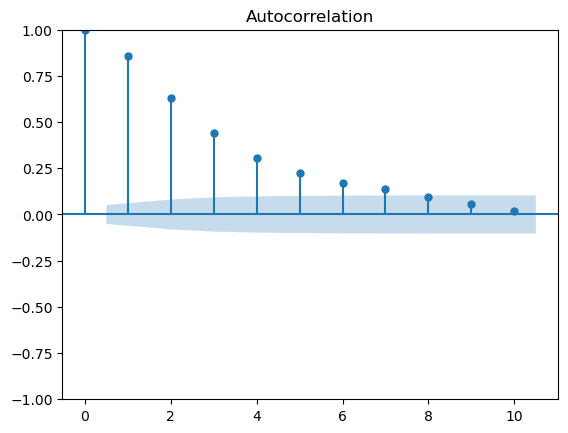

In [33]:
acf = plot_acf(train_data['cbl (Mean CBL Pressure-hpa)'], lags=10)

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


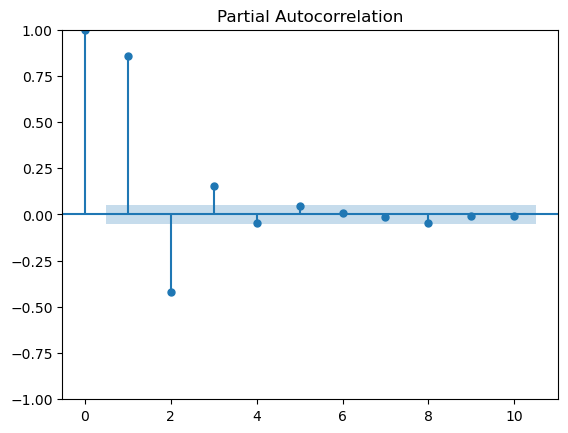

In [34]:
pacf = plot_pacf(train_data['cbl (Mean CBL Pressure-hpa)'], lags=10)

In [35]:
#looking the above acf and pacf figures the the values comes 7 and 3 so build the 4-5 models to check who give the less AIC values
#ARIMA(2,0,1)

In [36]:
#building the models
model1_arima= ARIMA(train_data['cbl (Mean CBL Pressure-hpa)'], order =(2,0,1))
model1_fit = model1_arima.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [37]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                          ARIMA(2, 0, 1)   Log Likelihood               -4581.827
Date:                         Sun, 31 Dec 2023   AIC                           9173.653
Time:                                 21:52:57   BIC                           9200.088
Sample:                             01-01-2019   HQIC                          9183.514
                                  - 12-31-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.1762      0.913   1099.189      0.000    1001.387    1004.965
ar.L1          0.9273      0.047     19.922      0.000       0.836       1.019
ar.L2         -0.1643      0.045     -3.669      0.000      -0.252      -0.077
ma.L1          0.3675      0.044      8.436      0.000       0.282       0.453
sigma2        30.9712      0.982     31.532      0.000      29.046      32.896
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               102.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
#ARIMA(1,0,2)

In [39]:
model2_arima= ARIMA(train_data['cbl (Mean CBL Pressure-hpa)'], order =(1,0,2))
model2_fit = model2_arima.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [40]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                          ARIMA(1, 0, 2)   Log Likelihood               -4581.949
Date:                         Sun, 31 Dec 2023   AIC                           9173.899
Time:                                 21:52:58   BIC                           9200.333
Sample:                             01-01-2019   HQIC                          9183.760
                                  - 12-31-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.1759      0.928   1080.582      0.000    1001.356    1004.996
ar.L1          0.7132      0.027     26.316      0.000       0.660       0.766
ma.L1          0.5808      0.030     19.227      0.000       0.522       0.640
ma.L2          0.1076      0.029      3.684      0.000       0.050       0.165
sigma2        30.9727      0.987     31.383      0.000      29.038      32.907
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                98.57
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
#ARIMA(3,0,1)

In [42]:
model3_arima = ARIMA(train_data['cbl (Mean CBL Pressure-hpa)'], order =(3,0,1))
model3_fit = model3_arima.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [43]:
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                          ARIMA(3, 0, 1)   Log Likelihood               -4581.804
Date:                         Sun, 31 Dec 2023   AIC                           9175.608
Time:                                 21:52:59   BIC                           9207.330
Sample:                             01-01-2019   HQIC                          9187.441
                                  - 12-31-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.1779      0.922   1088.422      0.000    1001.371    1004.984
ar.L1          0.9566      0.122      7.849      0.000       0.718       1.196
ar.L2         -0.2029      0.157     -1.293      0.196      -0.510       0.105
ar.L3          0.0156      0.064      0.246      0.806      -0.109       0.140
ma.L1          0.3385      0.120      2.825      0.005       0.104       0.573
sigma2        30.9703      0.987     31.364      0.000      29.035      32.906
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               100.72
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
#ARIMA(1,0,3)

In [45]:
model4_arima= ARIMA(train_data['cbl (Mean CBL Pressure-hpa)'], order =(1,0,3))
model4_fit = model4_arima.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [46]:
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                          ARIMA(1, 0, 3)   Log Likelihood               -4581.804
Date:                         Sun, 31 Dec 2023   AIC                           9175.609
Time:                                 21:53:00   BIC                           9207.330
Sample:                             01-01-2019   HQIC                          9187.442
                                  - 12-31-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.1762      0.917   1093.433      0.000    1001.378    1004.974
ar.L1          0.6991      0.039     18.105      0.000       0.623       0.775
ma.L1          0.5959      0.041     14.411      0.000       0.515       0.677
ma.L2          0.1309      0.052      2.524      0.012       0.029       0.232
ma.L3          0.0206      0.034      0.611      0.541      -0.045       0.087
sigma2        30.9649      0.989     31.322      0.000      29.027      32.903
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               101.03
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
#autoarima function gives the best P, Q, D values
auto_arima(train_data['cbl (Mean CBL Pressure-hpa)'])

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True)

In [48]:
model5_arima= ARIMA(train_data['cbl (Mean CBL Pressure-hpa)'], order =(2,0,2))
model5_fit = model5_arima.fit()

C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\415vi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     cbl (Mean CBL Pressure-hpa)   No. Observations:                 1461
Model:                          ARIMA(2, 0, 2)   Log Likelihood               -4581.809
Date:                         Sun, 31 Dec 2023   AIC                           9175.618
Time:                                 21:53:24   BIC                           9207.339
Sample:                             01-01-2019   HQIC                          9187.451
                                  - 12-31-2022                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1003.1763      0.919   1091.488      0.000    1001.375    1004.978
ar.L1          0.8759      0.281      3.119      0.002       0.326       1.426
ar.L2         -0.1255      0.216     -0.581      0.561      -0.549       0.298
ma.L1          0.4191      0.281      1.491      0.136      -0.132       0.970
ma.L2          0.0273      0.142      0.193      0.847      -0.251       0.305
sigma2        30.9711      0.988     31.337      0.000      29.034      32.908
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               100.99
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
#Conclusion The ARIMA(6,0,3) model2 has the lowest AIC.
#In the above we use the auto_arima function from pm-darima module determine the model order (2,0,2)
#There is very less AIC value difference between ARIMA(2,0,2) and ARIMA(6,0,3)

<Axes: title={'center': 'Residuals of ARIMA Model'}, xlabel='date'>

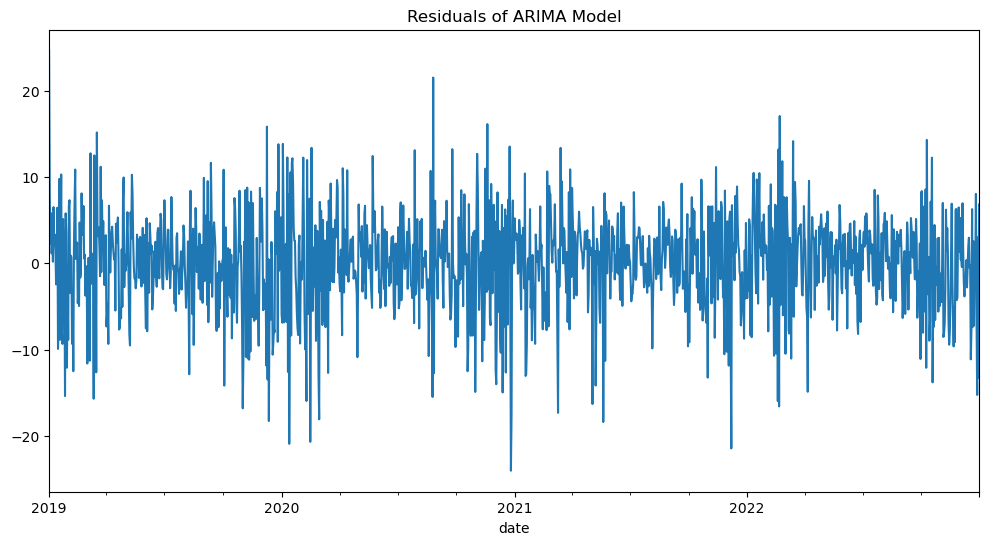

In [51]:
#dianostics, plot the Residual of ARIMA model
plt.figure(figsize=(12, 6))
model2_fit.resid.plot(title='Residuals of ARIMA Model')

In [52]:
#Check serieal correaltion exists in the residual we can do Ljung-Box test
#h0 = The sereis is independenly
#h11 = The series is not independently distributes - it exhibits serial correaltion

In [53]:
acorr_ljungbox(model2_fit.resid, lags=10)

,lb_stat,lb_pvalue
1,0.013890,0.906183
2,0.028708,0.985749
3,0.039040,0.997972
4,0.583994,0.964826
5,1.011662,0.961620
6,1.019852,0.984849
7,4.080346,0.770478
8,4.329375,0.826251
9,4.411483,0.882306
10,5.188279,0.878251


In [54]:
#At all lags upto 10 the p value is not significant, indication the no serial correalion is present

In [55]:
# Evaluation, plot the residual

<Axes: ylabel='Density'>

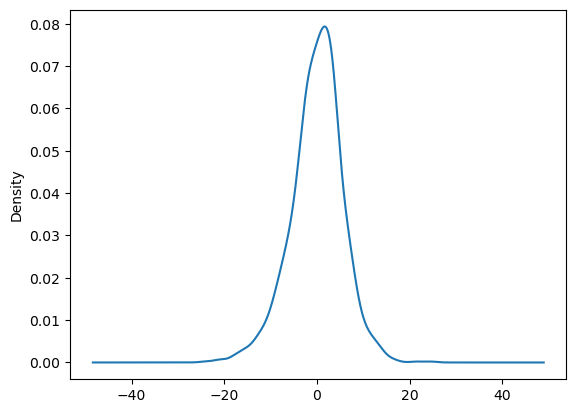

In [56]:
model2_fit.resid.plot(kind='kde')

In [57]:
#It look like normal distributes graph, it means we are moving in the right direction
#we put the predicted values in the new coloumn name Predicted arima

In [58]:
model2_pred = model2_fit.forecast(len(test_data))

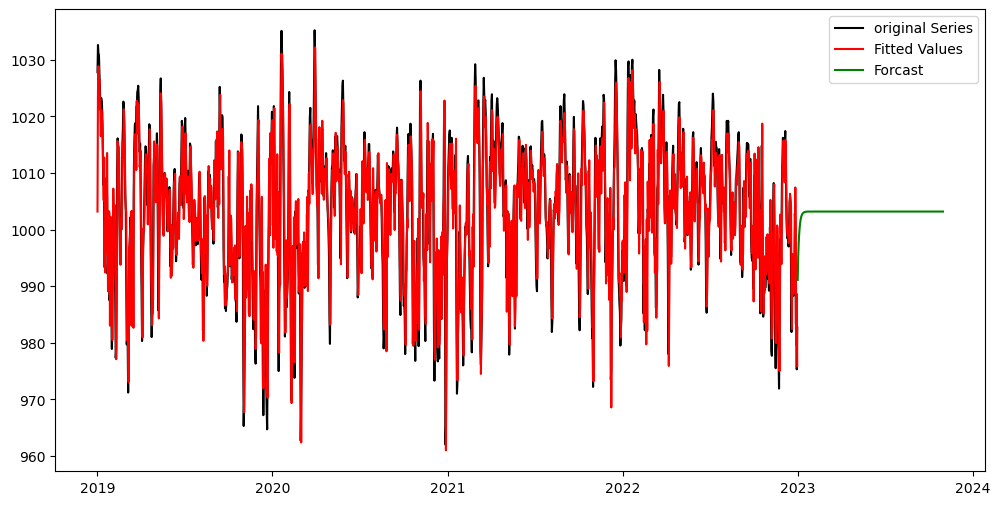

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(train_data['cbl (Mean CBL Pressure-hpa)'], color='black', label='original Series')
plt.plot(model2_fit.fittedvalues, color='red', label = 'Fitted Values')
plt.plot(model2_pred, color='green', label='Forcast')
plt.legend()

In [60]:
#calculate MAE, RMSE, MAPE

In [61]:
model2_mae = mean_absolute_error(train_data['cbl (Mean CBL Pressure-hpa)'], model2_fit.fittedvalues)
model2_rmse = mean_squared_error(train_data['cbl (Mean CBL Pressure-hpa)'], model2_fit.fittedvalues)**0.5
model2_mape = mean_absolute_percentage_error(train_data['cbl (Mean CBL Pressure-hpa)'], model2_fit.fittedvalues)

print("ARIMA(7,0,3) = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(model2_mae, model2_rmse, model2_mape))

ARIMA(7,0,3) = MAE:4.275, RMSE:5.596, MAPE:0.004


In [62]:
##calculate MAE, RMSE, MAPE for the forcast

In [63]:
model2_maef = mean_absolute_error(test_data['cbl (Mean CBL Pressure-hpa)'], model2_pred)
model2_rmsef = mean_squared_error(test_data['cbl (Mean CBL Pressure-hpa)'], model2_pred)**0.5
model2_mapef = mean_absolute_percentage_error(test_data['cbl (Mean CBL Pressure-hpa)'], model2_pred)

print("ARIMA(7,0,3) = MAE:{:.3f}, RMSE:{:.3f}, MAPE:{:.3f}".format(model2_maef, model2_rmsef, model2_mapef))

ARIMA(7,0,3) = MAE:9.871, RMSE:12.542, MAPE:0.010
